***Task 1:- Predicting Restaurant Ratings***

In [ ]:
#importing libraries
import pandas as pd
import numpy as np
from sklearn.preprocessing import LabelEncoder, OneHotEncoder
from sklearn.impute import SimpleImputer
from sklearn.ensemble import RandomForestRegressor


In [ ]:
df=pd.read_csv("/content/Dataset .csv")
df
df.head(5)

,Restaurant ID,Restaurant Name,Country Code,City,Address,Locality,Locality Verbose,Longitude,Latitude,Cuisines,...,Currency,Has Table booking,Has Online delivery,Is delivering now,Switch to order menu,Price range,Aggregate rating,Rating color,Rating text,Votes
0,6317637,Le Petit Souffle,162,Makati City,"Third Floor, Century City Mall, Kalayaan Avenu...","Century City Mall, Poblacion, Makati City","Century City Mall, Poblacion, Makati City, Mak...",121.027535,14.565443,"French, Japanese, Desserts",...,Botswana Pula(P),Yes,No,No,No,3,4.8,Dark Green,Excellent,314
1,6304287,Izakaya Kikufuji,162,Makati City,"Little Tokyo, 2277 Chino Roces Avenue, Legaspi...","Little Tokyo, Legaspi Village, Makati City","Little Tokyo, Legaspi Village, Makati City, Ma...",121.014101,14.553708,Japanese,...,Botswana Pula(P),Yes,No,No,No,3,4.5,Dark Green,Excellent,591
2,6300002,Heat - Edsa Shangri-La,162,Mandaluyong City,"Edsa Shangri-La, 1 Garden Way, Ortigas, Mandal...","Edsa Shangri-La, Ortigas, Mandaluyong City","Edsa Shangri-La, Ortigas, Mandaluyong City, Ma...",121.056831,14.581404,"Seafood, Asian, Filipino, Indian",...,Botswana Pula(P),Yes,No,No,No,4,4.4,Green,Very Good,270
3,6318506,Ooma,162,Mandaluyong City,"Third Floor, Mega Fashion Hall, SM Megamall, O...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.056475,14.585318,"Japanese, Sushi",...,Botswana Pula(P),No,No,No,No,4,4.9,Dark Green,Excellent,365
4,6314302,Sambo Kojin,162,Mandaluyong City,"Third Floor, Mega Atrium, SM Megamall, Ortigas...","SM Megamall, Ortigas, Mandaluyong City","SM Megamall, Ortigas, Mandaluyong City, Mandal...",121.057508,14.584450,"Japanese, Korean",...,Botswana Pula(P),Yes,No,No,No,4,4.8,Dark Green,Excellent,229


**step 1:- Data Preproccesing**

In [ ]:
df['Cuisines'] = df['Cuisines'].fillna('Unknown')

In [ ]:
#Encoding categorical variables
binary_col=['Has Table booking', 'Has Online delivery', 'Is delivering now', 'Switch to order menu']
for column in binary_col:
  df[column]=df[column].apply(lambda x: 1 if x=='Yes' else 0)

In [ ]:
#one hot encoding for multi class columns
df=pd.get_dummies(df,columns=['City', 'Cuisines', 'Currency'], drop_first=True)

In [ ]:
#dropping irrelevant columns
df=df.drop(columns=['Restaurant ID', 'Restaurant Name', 'Address', 'Locality', 'Locality Verbose', 'Rating color', 'Rating text'])

**step 2:- Train Test Split of data**

In [ ]:
from sklearn.model_selection import train_test_split
x=df.drop(columns=['Aggregate rating'])#features
y=df['Aggregate rating'] #target variable
xtrain,xtest,ytrain,ytest=train_test_split(x,y,test_size=0.20,random_state=42)

**step 3:- Model selection and Training**

In [ ]:
from sklearn.linear_model import LinearRegression
lr_model=LinearRegression()
lr_model.fit(xtrain,ytrain)

LinearRegression()

In [ ]:
rf_model=RandomForestRegressor(n_estimators=100,random_state=42)
rf_model.fit(xtrain,ytrain)

RandomForestRegressor(random_state=42)

**Step 4:-model Evaluate**

In [ ]:
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
def evaluate_model(model, xtrain, xtest, ytrain, ytest):
    y_train_pred = model.predict(xtrain)
    y_test_pred = model.predict(xtest)
    print(f"Model: {type(model).__name__}")
    print("Training Set Performance:")
    print(f"Mean Squared Error: {mean_squared_error(ytrain, y_train_pred)}")
    print(f"R-squared: {r2_score(ytrain, y_train_pred)}")
    print(f"Mean Absolute Error: {mean_absolute_error(ytrain, y_train_pred)}\n")

    print("Test Set Performance:")
    print(f"Mean Squared Error: {mean_squared_error(ytest, y_test_pred)}")
    print(f"R-squared: {r2_score(ytest, y_test_pred)}")
    print(f"Mean Absolute Error: {mean_absolute_error(ytest, y_test_pred)}\n")


In [ ]:
evaluate_model(lr_model, xtrain, xtest, ytrain, ytest)
evaluate_model(rf_model, xtrain, xtest, ytrain, ytest)


Model: LinearRegression
Training Set Performance:
Mean Squared Error: 1.1845767232606936
R-squared: 0.48602191753214374
Mean Absolute Error: 0.8209920799102537

Test Set Performance:
Mean Squared Error: 1.989641275993026
R-squared: 0.1258585223889065
Mean Absolute Error: 1.1624536444753546

Model: RandomForestRegressor
Training Set Performance:
Mean Squared Error: 0.012935589921465986
R-squared: 0.9943873540878597
Mean Absolute Error: 0.07251321989528806

Test Set Performance:
Mean Squared Error: 0.08991232077446365
R-squared: 0.9604973570434172
Mean Absolute Error: 0.1934971219256934



# **Interpretation:**

**Training Set Performance:**
Both models exhibit strong performance on the training set, with the Random Forest Regressor achieving significantly lower MSE and MAE, and a much higher R-squared compared to the Linear Regression. This suggests that the Random Forest Regressor is able to fit the training data much better.

**Test Set Performance:**
The Random Forest Regressor still outperforms the Linear Regression on the test set, but the performance gap is not as wide. This indicates that the Random Forest Regressor is less likely to overfit the training data and generalizes better to unseen data.

**step5:- feature importance**

In [ ]:
importances=rf_model.feature_importances_
feature_names=x.columns

In [ ]:
indices = np.argsort(importances)[::-1]#sort in descending oder

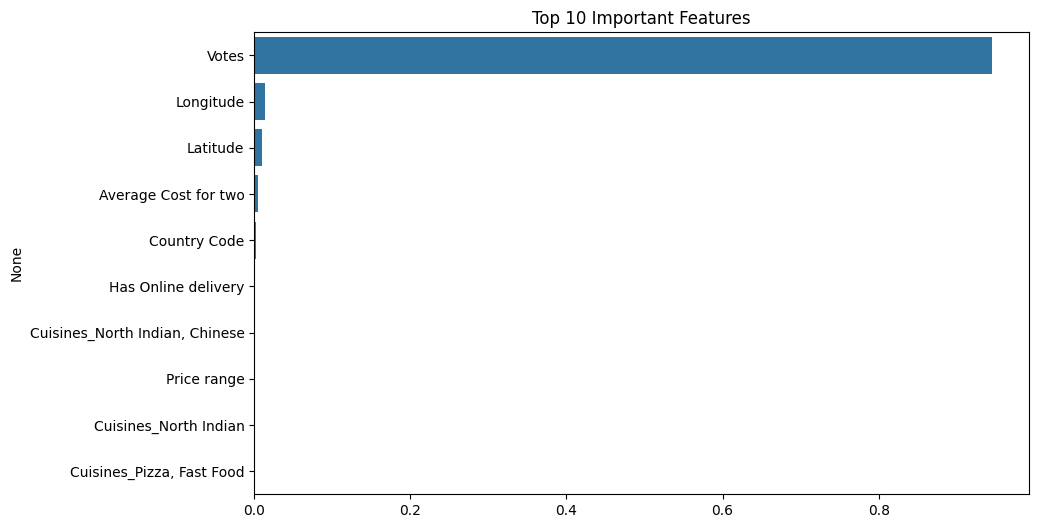

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns
plt.figure(figsize=(10, 6))
plt.title("Top 10 Important Features")
sns.barplot(x=importances[indices[:10]], y=feature_names[indices[:10]])
plt.show()

**Most influential features affecting restaurant ratings:-**

The analysis suggests that the number of votes, location, average cost, and availability of online delivery are the most important factors affecting restaurant ratings in the given dataset. While cuisines and price range might have some influence, they are less significant compared to these other factors.